In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 경고문구 무시
import warnings
warnings.filterwarnings('ignore')

# 이미지 해상도 높이기 
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [108]:
origin = pd.read_excel('계량표_제설염_(당진항).xlsx')

origin.drop(columns=['No.','품목명','총중량(Kg)','공차중량(Kg)','인수량(Kg)','누적합계(Kg)','누적합계(t)'],axis=1,inplace=True)

origin.rename(columns = {'실중량(Kg)': '당진항_계량중량(Kg)'},inplace=True)

In [109]:
comp = pd.read_excel('비교계량표_제설염_(논산IC주유소).xlsx')

comp.dropna(axis=0,inplace=True)

comp.drop(columns=['No.','품목명','총중량(Kg)','공차중량(Kg)','인수량(Kg)','누적합계(Kg)','누적합계(t)'],axis=1,inplace=True)

comp.rename(columns = {'실중량(Kg)': '논산IC주유소_계량중량(Kg)'},inplace=True)

In [110]:
# s_carnum = origin['차량번호'].unique()
# s_date   = origin['계량일자'].unique()

# s_carnum

# s_date

# a = pd.DataFrame()

# for x in s_date:
    
#     for y in s_carnum:
        
#         # print(origin['계량일자'] == x)
#         b = origin.loc[(origin['계량일자'] == x) & (origin['차량번호'] == y),['계량일자','차량번호','실중량(Kg)']]
#         b = pd.DataFrame(b)
         
#         a = pd.concat([a, b])

In [111]:
df = pd.merge(origin,comp, how = 'inner', on=['계량일자','차량번호'])

df['오차범위(Kg)'] = df['당진항_계량중량(Kg)'] * 0.05

df['실제_차이량(Kg)'] = abs(df['당진항_계량중량(Kg)'] - df['논산IC주유소_계량중량(Kg)'] )

df['오차범위_통과'] = '-'

for x in range(0,4):
    if (df['오차범위(Kg)'][x] - df['실제_차이량(Kg)'][x]) > 0 :
        df['오차범위_통과'][x] = 'Pass'
    else:
        df['오차범위_통과'][x] = 'False'

In [112]:
df

,계량일자,차량번호,당진항_계량중량(Kg),논산IC주유소_계량중량(Kg),오차범위(Kg),실제_차이량(Kg),오차범위_통과
0,2023년09월01일,경기92아7395,27480,27350,1374.0,130,Pass
1,2023년09월01일,전북91사3523,27700,27580,1385.0,120,Pass
2,2023년09월04일,충남87바2216,27380,27280,1369.0,100,Pass
3,2023년09월04일,전북81사4163,27640,27540,1382.0,100,Pass


In [118]:
df.index

RangeIndex(start=0, stop=4, step=1)

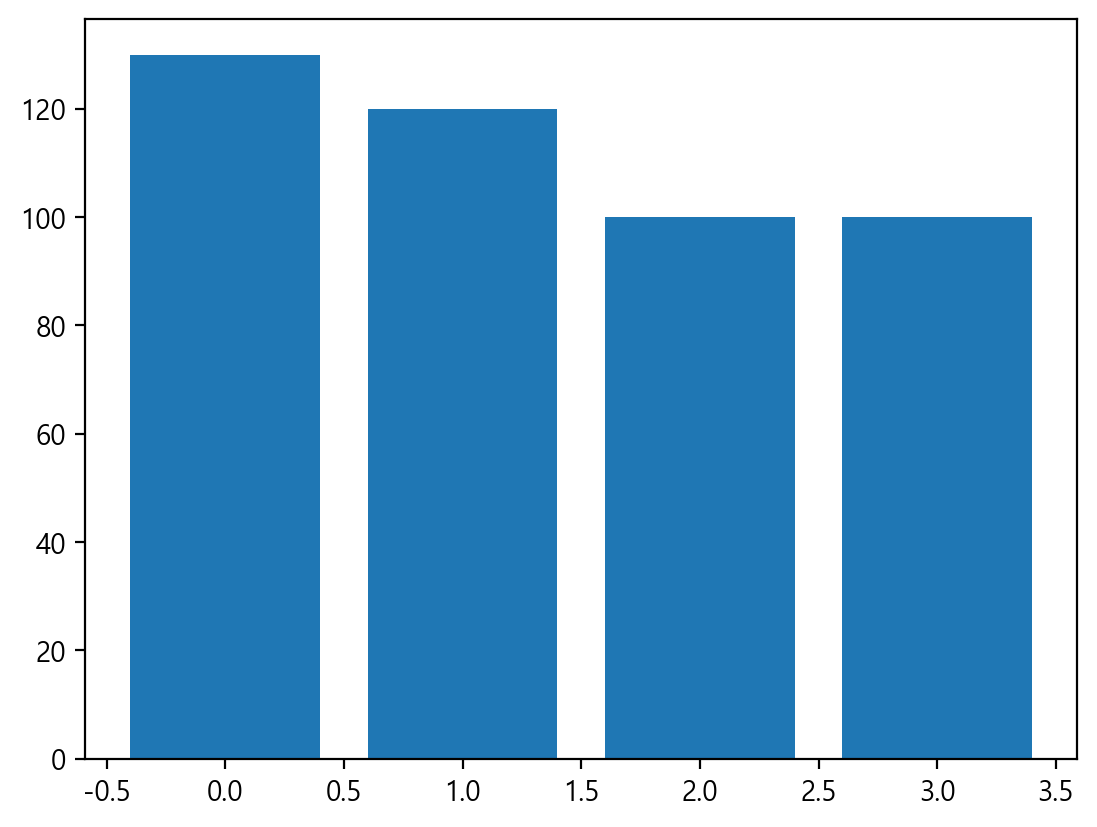

In [119]:
plt.bar(df.index,df['실제_차이량(Kg)'])
plt.show()

In [122]:
df.head()

,계량일자,차량번호,당진항_계량중량(Kg),논산IC주유소_계량중량(Kg),오차범위(Kg),실제_차이량(Kg),오차범위_통과
0,2023년09월01일,경기92아7395,27480,27350,1374.0,130,Pass
1,2023년09월01일,전북91사3523,27700,27580,1385.0,120,Pass
2,2023년09월04일,충남87바2216,27380,27280,1369.0,100,Pass
3,2023년09월04일,전북81사4163,27640,27540,1382.0,100,Pass


In [123]:
df['오차범위_통과'].value_counts()

오차범위_통과
Pass    4
Name: count, dtype: int64